## Exploring and Preparing Data

I will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.
I will perform <b>Exploratory Data Analysis and Feature Engineering.</b>

## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering

In [1]:
pip install numpy pandas seaborn matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv(r"C:\Users\singh\Downloads\SpaceX Falcon 9\SpaceX_data_wrangling.csv")
df.head(2)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,landing_class
0,1,04-06-2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B0003,-80.577366,28.561857,0
1,2,22-05-2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B0005,-80.577366,28.561857,0


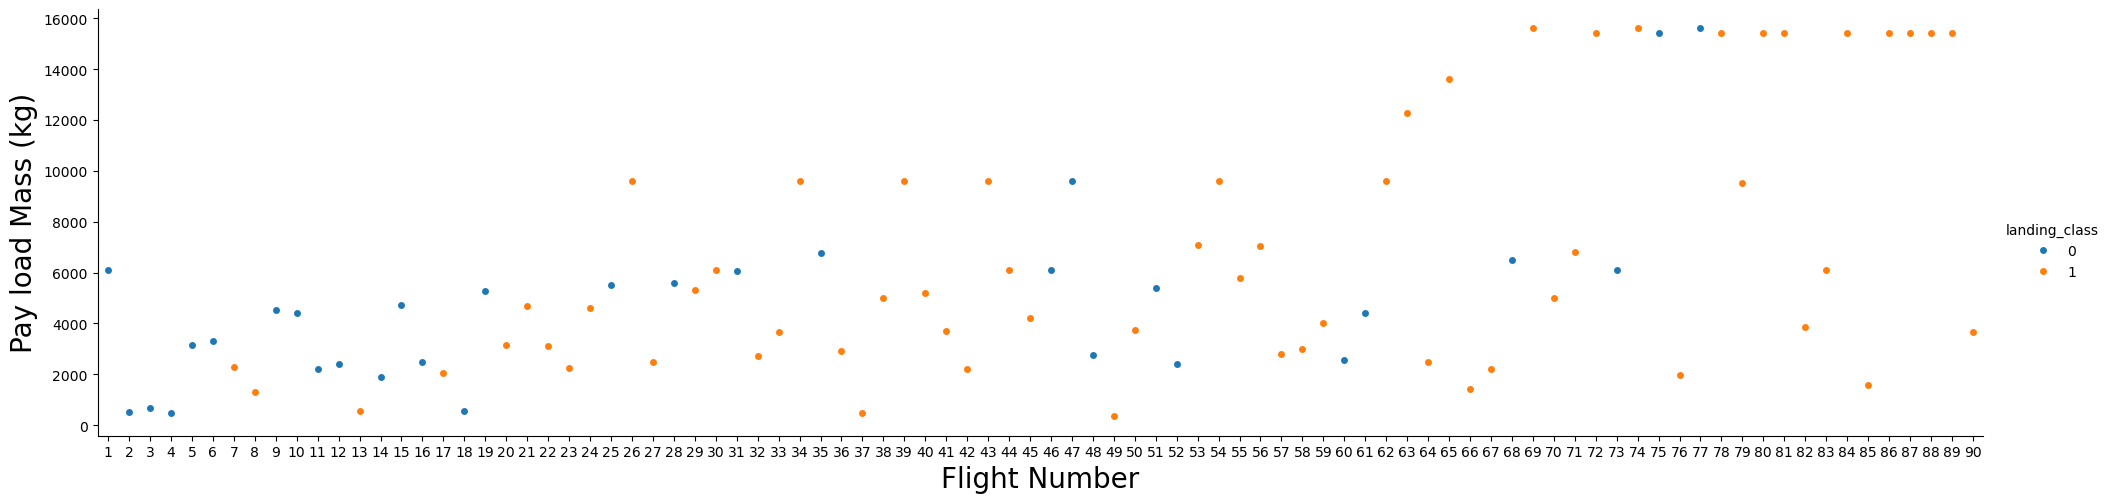

In [26]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="landing_class", data=df, aspect = 4)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

First, Try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

I plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. See that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.

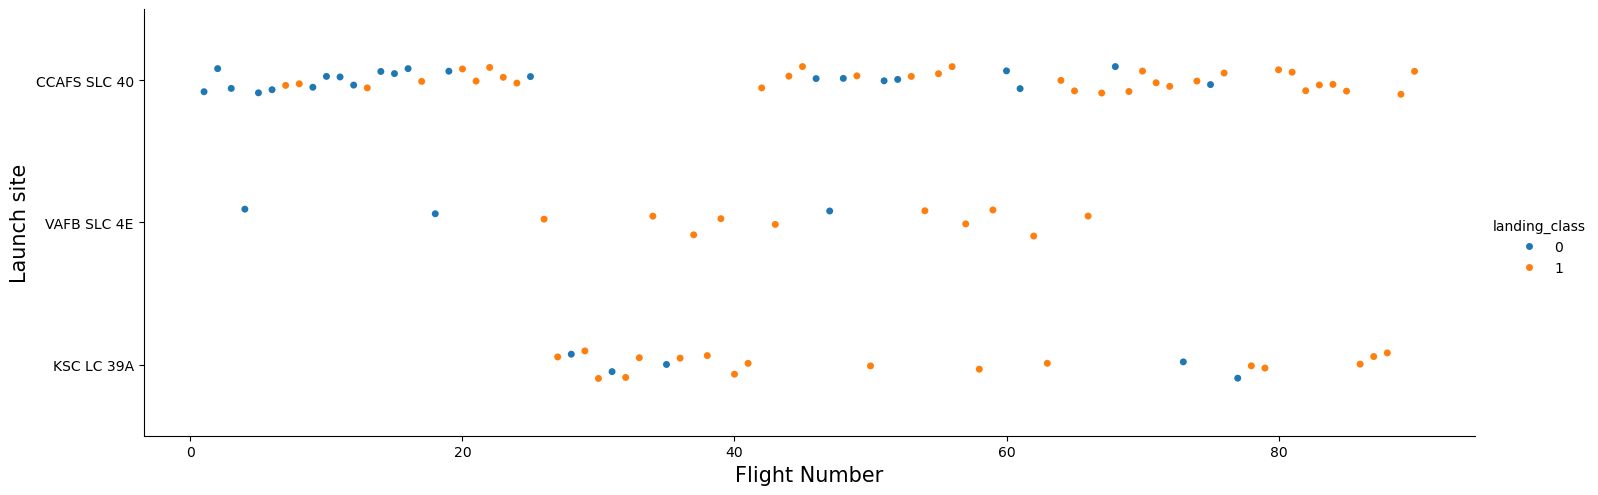

In [28]:
#Visualize the relationship between Flight Number and Launch Site
sns.catplot(y="LaunchSite",x = "FlightNumber" , hue = "landing_class",data = df, aspect = 3)
plt.xlabel("Flight Number",fontsize = 15)
plt.ylabel("Launch site" , fontsize = 15)
plt.show()

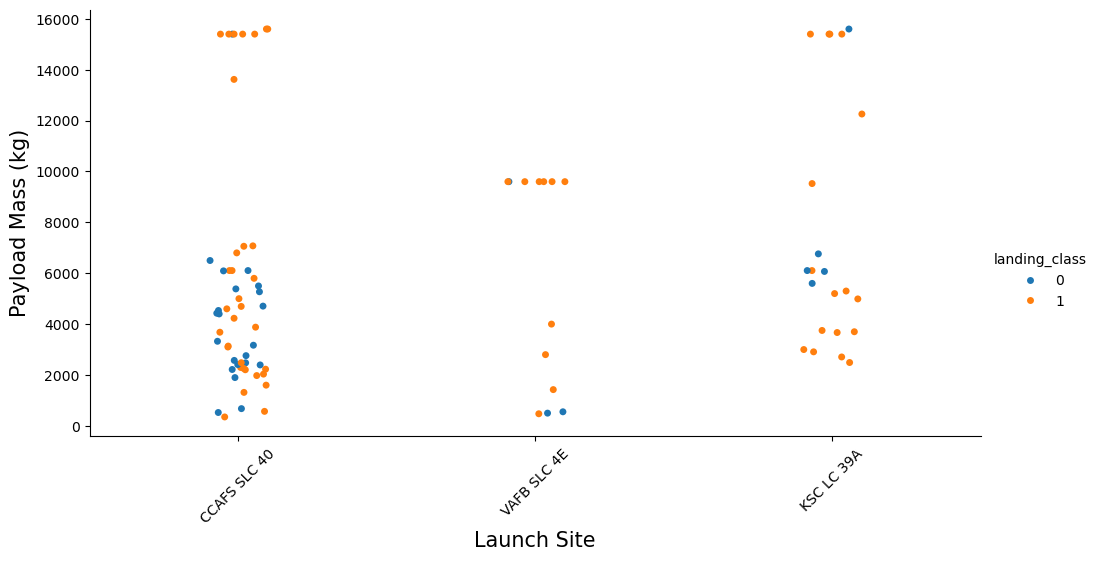

In [35]:
#I also want to observe if there is any relationship between launch sites and their payload mass.
sns.catplot(x="LaunchSite",y="PayloadMass",hue="landing_class",data=df,aspect=2)
plt.xlabel("Launch Site", fontsize=15)
plt.ylabel("Payload Mass (kg)", fontsize=15)
plt.xticks(rotation=45)
plt.show()

<b> I observe Payload Mass Vs. Launch Site scatter point chart you will find for the VAFB-SLC launchsite there are no rockets launched for heavypayload mass(greater than 10000).</b>

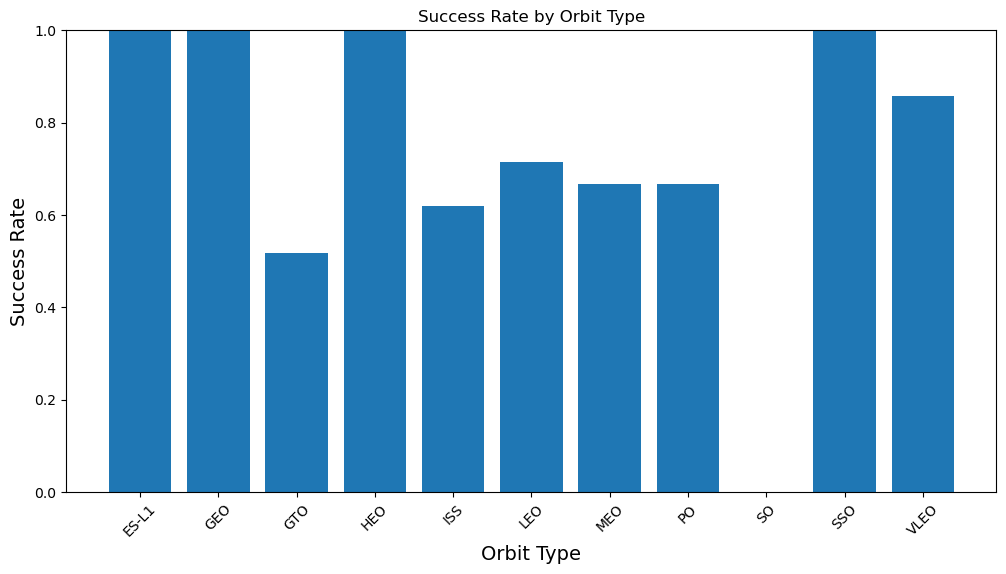

In [48]:
# Visualize the relationship between success rate of each orbit type
orbit_success = df.groupby('Orbit')['landing_class'].mean()  # Mean of a binary variable success rate (landing_class → 1 = success, 0 = failure)
plt.figure(figsize=(12,6))
plt.bar(orbit_success.index, orbit_success.values)

plt.xlabel("Orbit Type", fontsize=14)
plt.ylabel("Success Rate", fontsize=14)
plt.title("Success Rate by Orbit Type", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 1)

plt.show()

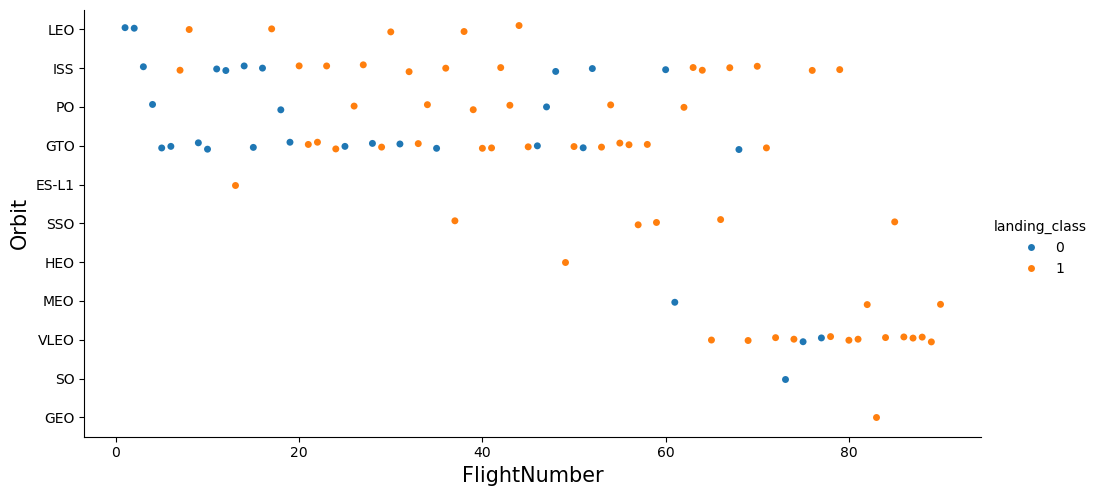

In [43]:
sns.catplot(x = "FlightNumber", y = "Orbit" , hue = "landing_class" , data  = df , aspect = 2)
plt.ylabel("Orbit" , fontsize = 15)
plt.xlabel("FlightNumber", fontsize = 15)
plt.show()

<b> I'm observing that in the LEO orbit, success seems to be related to the number of flights. Conversely, in the GTO orbit, there appears to be no relationship between flight number and success.</b>

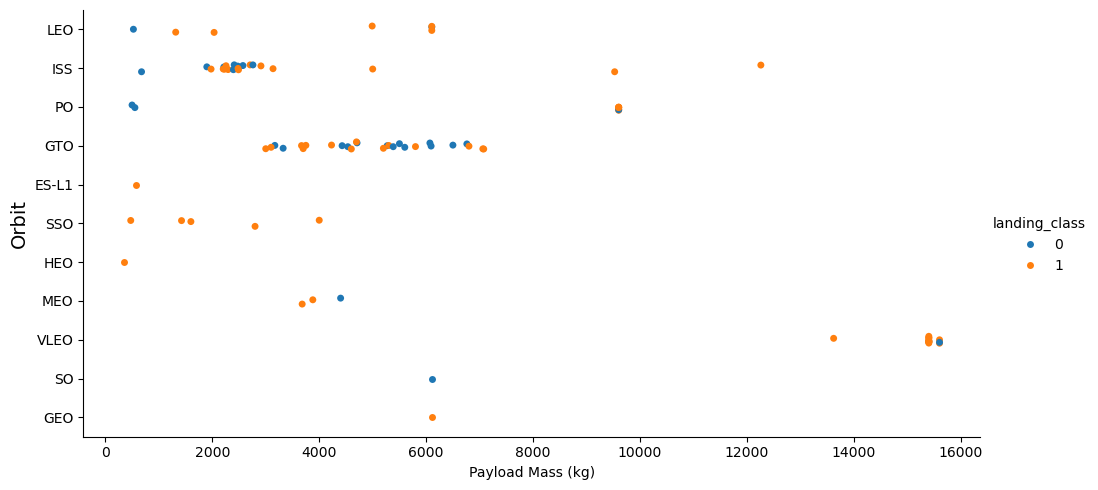

In [47]:
sns.catplot(x="PayloadMass", y="Orbit", hue="landing_class", data=df, aspect=2)
plt.ylabel("Orbit", fontsize=14)
plt.xlabel("Payload Mass (kg)", fontsize=10)
plt.show()

<b> With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.
However, for GTO, it's difficult to distinguish between successful and unsuccessful landings as both outcomes are present. </b>

In [51]:
# Extract Year from Date
year = []

def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

Extract_year()
df["Year"] = year
df.head(2)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,landing_class,Year
0,1,04-06-2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B0003,-80.577366,28.561857,0,04
1,2,22-05-2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B0005,-80.577366,28.561857,0,22


In [56]:
df["Year"] = df["Year"].astype(int)
yearly_success = df.groupby("Year")["landing_class"].mean()  # GroupBy success rate as per Year Column
yearly_success

Year
1     0.333333
2     0.500000
3     0.750000
4     0.400000
5     0.400000
6     0.400000
7     0.800000
8     1.000000
9     1.000000
10    0.500000
11    1.000000
12    1.000000
13    1.000000
14    0.800000
15    0.666667
16    0.000000
17    0.333333
18    0.833333
19    0.500000
20    1.000000
21    0.000000
22    0.750000
23    0.666667
24    1.000000
25    1.000000
27    0.500000
28    0.000000
29    0.333333
30    0.833333
31    1.000000
Name: landing_class, dtype: float64

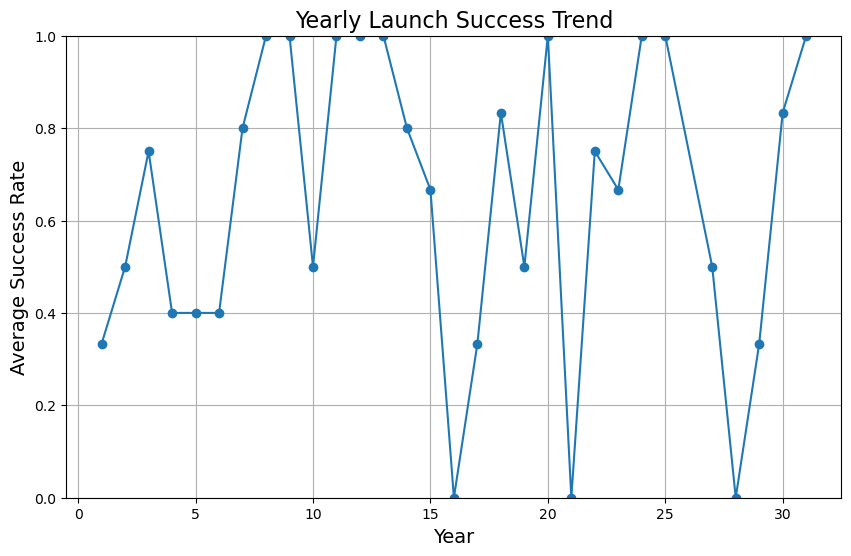

In [57]:
plt.figure(figsize=(10,6))
plt.plot(yearly_success.index, yearly_success.values, marker='o')

plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Success Rate", fontsize=14)
plt.title("Yearly Launch Success Trend", fontsize=16)
plt.ylim(0, 1)
plt.grid(True)

plt.show()

### Features Engineering
I need to select the features that will be used in success prediction.

In [58]:
features = df[
    ['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite',
     'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad',
     'Block', 'ReusedCount', 'Serial']
]

features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1,0,B1004


In [66]:
features.isnull().sum()
features = features.dropna()

In [67]:
features[['GridFins', 'Reused', 'Legs']] = features[
    ['GridFins', 'Reused', 'Legs']
].astype(int)

In [70]:
features_one_hot = pd.get_dummies(
    features,
    columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial']
)

In [72]:
features_one_hot = features_one_hot.astype('float64')
features_one_hot.head(5)

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_GEO,Orbit_GTO,...,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
11,12.0,2395.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,14.0,1898.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,16.0,2477.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,17.0,2034.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,18.0,553.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
features_one_hot.to_csv('EDAxDataset.csv', index=False)